### 전력소비량 예측 데이터 전처리 & EDA
#### 목차
1. 데이터 로드
2. 데이터 탐색
3. 데이터 병합
4. EDA
5. 결측값 처리
6. 이상치 처리
7. 전처리된 데이터 저장

##### 1. 데이터 로드

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import config.config as cf
# 한글 폰트 설정
plt.rc("font", family = "Malgun Gothic")
sns.set_theme(font="Malgun Gothic")

In [16]:
train = pd.read_csv(f'{cf.RAWDATA_DIR}/train.csv')
test = pd.read_csv(f'{cf.RAWDATA_DIR}/test.csv')
sample = pd.read_csv(f'{cf.RAWDATA_DIR}/sample_submission.csv')
building = pd.read_csv(f'{cf.RAWDATA_DIR}/building_info.csv')

##### 2. 데이터 탐색

In [17]:
#=== Data Overview ===
print(train.shape, test.shape, sample.shape, building.shape)
print("\n칼럼명:")
print(f"train: {list(train.columns)}")
print(f"test: {list(test.columns)}")
print(f"sample: {list(sample.columns)}")
print(f"building: {list(building.columns)}")

(204000, 10) (16800, 7) (16800, 2) (100, 7)

칼럼명:
train: ['num_date_time', '건물번호', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '일조(hr)', '일사(MJ/m2)', '전력소비량(kWh)']
test: ['num_date_time', '건물번호', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']
sample: ['num_date_time', 'answer']
building: ['건물번호', '건물유형', '연면적(m2)', '냉방면적(m2)', '태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)']


In [18]:
#=== Train Data 미리보기 ===
display(train.head())
print(train.dtypes)

,num_date_time,건물번호,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20240601 00,1,20240601 00,18.3,0.0,2.6,82.0,0.0,0.0,5794.80
1,1_20240601 01,1,20240601 01,18.3,0.0,2.7,82.0,0.0,0.0,5591.85
2,1_20240601 02,1,20240601 02,18.1,0.0,2.6,80.0,0.0,0.0,5338.17
3,1_20240601 03,1,20240601 03,18.0,0.0,2.6,81.0,0.0,0.0,4554.42
4,1_20240601 04,1,20240601 04,17.8,0.0,1.3,81.0,0.0,0.0,3602.25


num_date_time     object
건물번호               int64
일시                object
기온(°C)           float64
강수량(mm)          float64
풍속(m/s)          float64
습도(%)            float64
일조(hr)           float64
일사(MJ/m2)        float64
전력소비량(kWh)       float64
dtype: object


In [19]:
#=== Building Data 미리보기 ===
display(building.head())
print(building.dtypes)

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,호텔,82912.71,77586.00,-,-,-
1,2,상용,40658.90,30392.82,-,-,-
2,3,병원,560431.00,418992.00,278.58,-,-
3,4,호텔,41813.29,23715.71,-,-,-
4,5,학교,403749.39,248507.00,1983.05,1025,250


건물번호              int64
건물유형             object
연면적(m2)         float64
냉방면적(m2)        float64
태양광용량(kW)        object
ESS저장용량(kWh)     object
PCS용량(kW)        object
dtype: object


In [20]:
# 결측값 확인
print(train.isnull().sum())
print(test.isnull().sum())
print(building.isnull().sum())

num_date_time    0
건물번호             0
일시               0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
습도(%)            0
일조(hr)           0
일사(MJ/m2)        0
전력소비량(kWh)       0
dtype: int64
num_date_time    0
건물번호             0
일시               0
기온(°C)           0
강수량(mm)          0
풍속(m/s)          0
습도(%)            0
dtype: int64
건물번호            0
건물유형            0
연면적(m2)         0
냉방면적(m2)        0
태양광용량(kW)       0
ESS저장용량(kWh)    0
PCS용량(kW)       0
dtype: int64


In [21]:
# Object 변수 고유값 확인
for col in train.select_dtypes(include=['object']).columns:
    print(f"{col} 고유값: {train[col].unique()}")

for col in building.select_dtypes(include=['object']).columns:
    print(f"{col} 고유값: {building[col].unique()}")

num_date_time 고유값: ['1_20240601 00' '1_20240601 01' '1_20240601 02' ... '100_20240824 21'
 '100_20240824 22' '100_20240824 23']
일시 고유값: ['20240601 00' '20240601 01' '20240601 02' ... '20240824 21' '20240824 22'
 '20240824 23']
건물유형 고유값: ['호텔' '상용' '병원' '학교' '건물기타' '아파트' '연구소' '백화점' 'IDC(전화국)' '공공']
태양광용량(kW) 고유값: ['-' '278.58' '1983.05' '389.76' '217.92' '1349.03' '276' '849.78'
 '1974.71' '97' '100' '255.88' '879.82' '858.02' '953.4' '83.95' '97.85'
 '344.96' '342' '12.24' '83.2' '74.25' '140.6' '77.76' '198.56' '10.08'
 '218.88' '1039.86' '105' '215.89' '1397.02' '199.4' '219.6' '820'
 '540.57' '50.88' '94.38' '1297.98' '1340.1' '103' '419.2' '36' '790.08'
 '605' '495' '282.95' '38.88' '77.38' '168' '322.9' '99.64' '20.25'
 '81.38' '171.6']
ESS저장용량(kWh) 고유값: ['-' '1025' '101.5' '500' '3100' '205' '469.2' '2000' '1670' '150' '201.1'
 '209']
PCS용량(kW) 고유값: ['-' '250' '101' '500' '1500' '150' '1000' '550' '75' '100']


Train data의 object 변수는 num_date_time & 일시로,
전자의 경우 고유의 ID를 나타내는 것이고,
후자는 datetime 객체로 변환할 필요가 있음.

Building data에서 수치로 보여지는 값들은 모종의 이유로 측정되지 않은 값을 ('-')로 표기하기 때문에, object가 된 것.
=> '-'를 nan으로 바꾸고, float data type으로 변환할 필요 있음.

건물유형 고유값: ['호텔' '상용' '병원' '학교' '건물기타' '아파트' '연구소' '백화점' 'IDC(전화국)' '공공']

In [22]:
# 일시 feature 전처리
# 20240721 09 형태 (YYYYMMDD HH) -> datetime 형태로 변환
train['일시'] = pd.to_datetime(train['일시'], format='%Y%m%d %H')
test['일시'] = pd.to_datetime(test['일시'], format='%Y%m%d %H')

In [23]:
# 일시에서 일자, 월, 일, 시 추출
train['일자'] = train['일시'].dt.date
train['월'] = train['일시'].dt.month
train['일'] = train['일시'].dt.day
train['시간대'] = train['일시'].dt.hour

test['일자'] = test['일시'].dt.date
test['월'] = test['일시'].dt.month
test['일'] = test['일시'].dt.day
test['시간대'] = test['일시'].dt.hour

In [24]:
# 주말/평일 구분
train['요일'] = train['일시'].dt.dayofweek.apply(lambda x: '주말' if x >= 5 else '평일')
test['요일'] = test['일시'].dt.dayofweek.apply(lambda x: '주말' if x >= 5 else '평일')
display(train[train['요일'] == '주말']) # 60000 rows
display(train[train['요일'] == '평일']) # 144000 rows

,num_date_time,건물번호,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),일자,월,일,시간대,요일
0,1_20240601 00,1,2024-06-01 00:00:00,18.3,0.0,2.6,82.0,0.0,0.00,5794.80,2024-06-01,6,1,0,주말
1,1_20240601 01,1,2024-06-01 01:00:00,18.3,0.0,2.7,82.0,0.0,0.00,5591.85,2024-06-01,6,1,1,주말
2,1_20240601 02,1,2024-06-01 02:00:00,18.1,0.0,2.6,80.0,0.0,0.00,5338.17,2024-06-01,6,1,2,주말
3,1_20240601 03,1,2024-06-01 03:00:00,18.0,0.0,2.6,81.0,0.0,0.00,4554.42,2024-06-01,6,1,3,주말
4,1_20240601 04,1,2024-06-01 04:00:00,17.8,0.0,1.3,81.0,0.0,0.00,3602.25,2024-06-01,6,1,4,주말
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100_20240824 19,100,2024-08-24 19:00:00,29.1,0.0,4.4,76.0,0.4,0.18,3276.00,2024-08-24,8,24,19,주말
203996,100_20240824 20,100,2024-08-24 20:00:00,28.6,0.0,3.7,74.0,0.0,0.00,3197.52,2024-08-24,8,24,20,주말
203997,100_20240824 21,100,2024-08-24 21:00:00,28.3,0.0,2.9,74.0,0.0,0.00,3006.60,2024-08-24,8,24,21,주말
203998,100_20240824 22,100,2024-08-24 22:00:00,28.0,0.0,1.7,76.0,0.0,0.00,2649.72,2024-08-24,8,24,22,주말


,num_date_time,건물번호,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),일자,월,일,시간대,요일
48,1_20240603 00,1,2024-06-03 00:00:00,18.1,0.0,1.0,59.0,0.0,0.00,4694.85,2024-06-03,6,3,0,평일
49,1_20240603 01,1,2024-06-03 01:00:00,17.6,0.0,1.6,66.0,0.0,0.00,3556.89,2024-06-03,6,3,1,평일
50,1_20240603 02,1,2024-06-03 02:00:00,17.0,0.0,1.7,71.0,0.0,0.00,4546.83,2024-06-03,6,3,2,평일
51,1_20240603 03,1,2024-06-03 03:00:00,16.7,0.0,1.3,74.0,0.0,0.00,4361.16,2024-06-03,6,3,3,평일
52,1_20240603 04,1,2024-06-03 04:00:00,16.1,0.0,2.4,77.0,0.0,0.00,3781.92,2024-06-03,6,3,4,평일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203971,100_20240823 19,100,2024-08-23 19:00:00,29.0,0.0,3.9,73.0,0.7,0.22,2206.92,2024-08-23,8,23,19,평일
203972,100_20240823 20,100,2024-08-23 20:00:00,28.6,0.0,4.4,75.0,0.0,0.00,2064.12,2024-08-23,8,23,20,평일
203973,100_20240823 21,100,2024-08-23 21:00:00,28.1,0.0,3.1,79.0,0.0,0.00,1161.12,2024-08-23,8,23,21,평일
203974,100_20240823 22,100,2024-08-23 22:00:00,28.0,0.0,3.0,80.0,0.0,0.00,2076.36,2024-08-23,8,23,22,평일


In [25]:
# 결측값이 없는게 아니었음
building.replace('-', np.nan, inplace=True)
building['태양광용량(kW)'] = pd.to_numeric(building['태양광용량(kW)'], errors='coerce')
building['ESS저장용량(kWh)'] = pd.to_numeric(building['ESS저장용량(kWh)'], errors='coerce')
building['PCS용량(kW)'] = pd.to_numeric(building['PCS용량(kW)'], errors='coerce')

In [26]:
building.isnull().sum()

건물번호             0
건물유형             0
연면적(m2)          0
냉방면적(m2)         0
태양광용량(kW)       47
ESS저장용량(kWh)    88
PCS용량(kW)       88
dtype: int64

In [27]:
# 태양광용량이 0인 건물이 있는지 확인 -> 확인결과 없음
print("태양광용량이 0인 건물:")
print(building[building['태양광용량(kW)'] == 0])
# ESS저장용량이 0인 건물이 있는지 확인
print("ESS저장용량이 0인 건물:")
print(building[building['ESS저장용량(kWh)'] == 0])
# PCS용량이 0인 건물이 있는지 확인
print("PCS용량이 0인 건물:")
print(building[building['PCS용량(kW)'] == 0])

태양광용량이 0인 건물:
Empty DataFrame
Columns: [건물번호, 건물유형, 연면적(m2), 냉방면적(m2), 태양광용량(kW), ESS저장용량(kWh), PCS용량(kW)]
Index: []
ESS저장용량이 0인 건물:
Empty DataFrame
Columns: [건물번호, 건물유형, 연면적(m2), 냉방면적(m2), 태양광용량(kW), ESS저장용량(kWh), PCS용량(kW)]
Index: []
PCS용량이 0인 건물:
Empty DataFrame
Columns: [건물번호, 건물유형, 연면적(m2), 냉방면적(m2), 태양광용량(kW), ESS저장용량(kWh), PCS용량(kW)]
Index: []


In [84]:
# 그렇다면 nan 값은 어떻게 처리할까?
# 태양광용량, ESS저장용량, PCS용량이 nan인 건물 확인


In [28]:
# 데이터 병합
train = train.merge(building, on='건물번호', how='left')
test = test.merge(building, on='건물번호', how='left')

##### 3. EDA (Exploratory Data Analysis)

예측 변수의 분포 파악

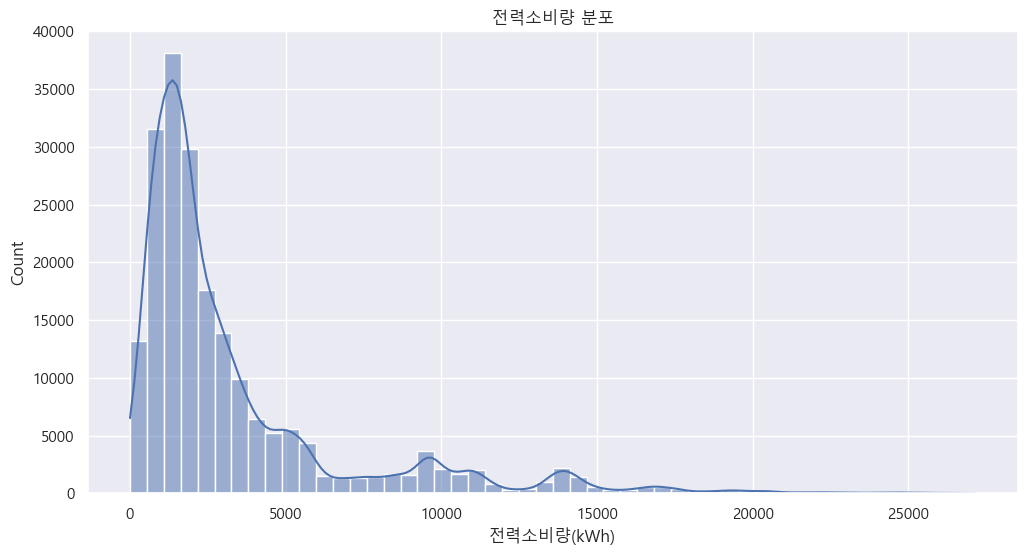

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=train, x='전력소비량(kWh)', bins=50, kde=True, ax=ax)
ax.set_title('전력소비량 분포')
ax.set_xlabel('전력소비량(kWh)')
plt.grid(True)
plt.show()

In [17]:
# 왜곡 확인
skewness = train['전력소비량(kWh)'].skew()
print(f"전력소비량(kWh) 왜곡도: {skewness:.2f}")

전력소비량(kWh) 왜곡도: 2.32


1. 시간대 관련 가설
- 시간대별로 전력소비량은 유의하게 다를 것이다.(예: 오후 2~5시 피크 가능성)
- 주말과 평일의 전력소비량 패턴은 다를 것이다. (건물마다 다를 수도)
- 공휴일에는 전력소비량이 낮을 것이다.
- 야간(18시~06시)에는 소비량이 낮을 것이다.


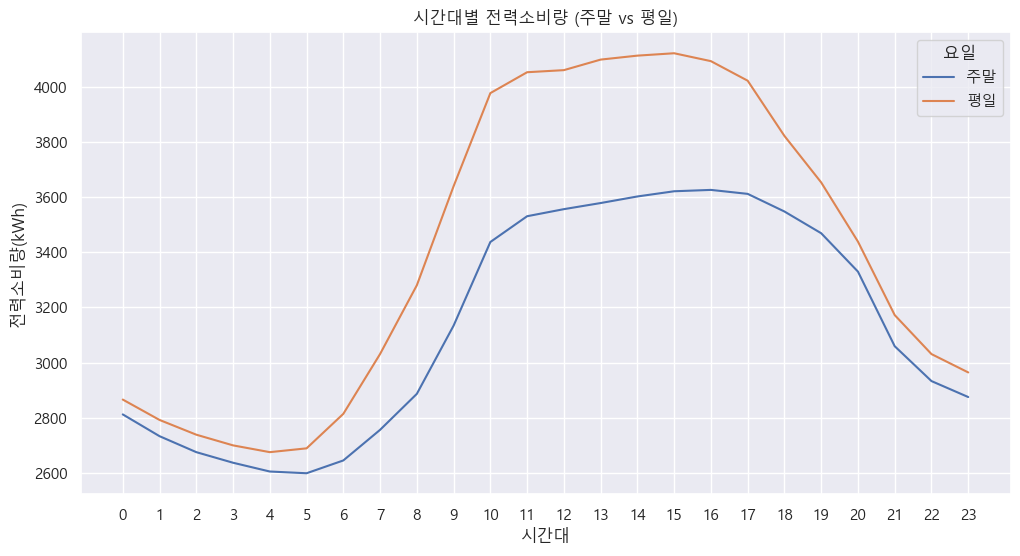

In [29]:
# 시간대별 전력소비량
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=train, x='시간대', y='전력소비량(kWh)', hue='요일', errorbar=None, ax=ax)
ax.set_title('시간대별 전력소비량 (주말 vs 평일)')
ax.set_xlabel('시간대')
ax.set_ylabel('전력소비량(kWh)')
plt.xticks(range(0, 24))  # 시간대는 0~23
plt.grid(True)
plt.show()

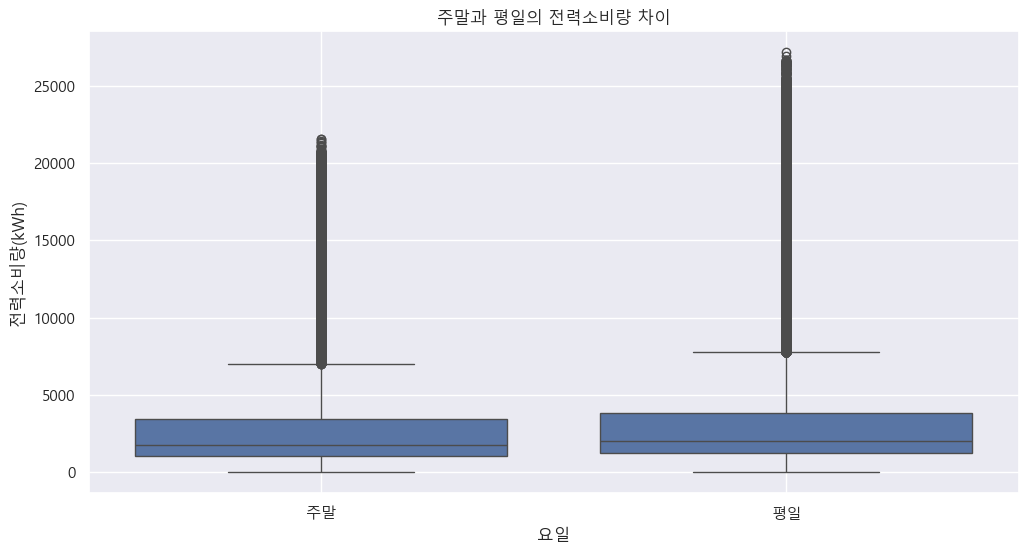

In [14]:
# 주말과 평일의 전력소비량 차이
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=train, x='요일', y='전력소비량(kWh)', ax=ax)
ax.set_title('주말과 평일의 전력소비량 차이')
ax.set_xlabel('요일')
ax.set_ylabel('전력소비량(kWh)')
plt.grid(True)
plt.show()

C:\Users\wldlsyy34\AppData\Local\Temp\ipykernel_3472\834550762.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['공휴일 X', '공휴일'])


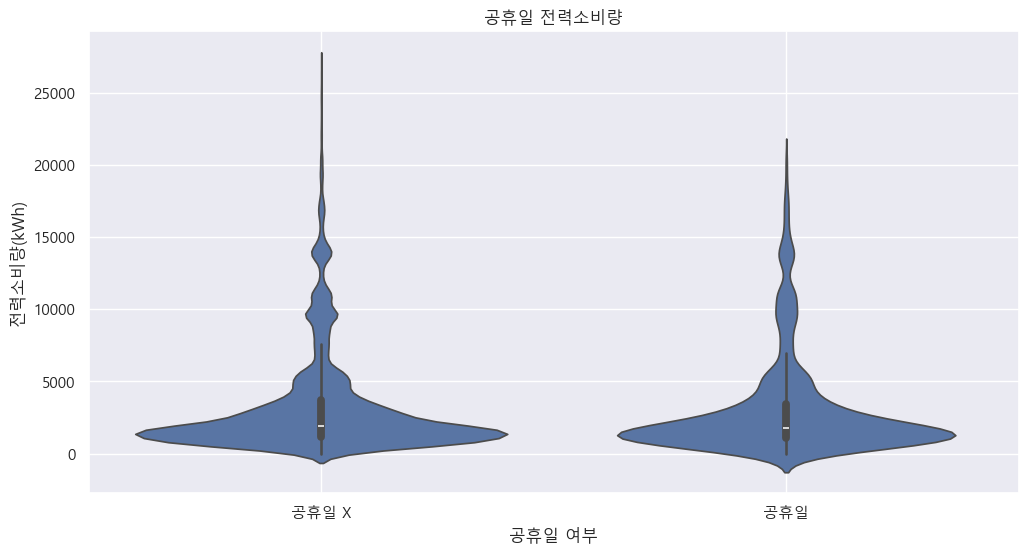

In [30]:
# 공휴일 전력소비량
is_holiday = train['일시'].dt.date.isin([
    pd.to_datetime('2024-06-06').date(),
    pd.to_datetime('2024-08-15').date()])

fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(data=train, x=is_holiday, y='전력소비량(kWh)', ax=ax)
ax.set_title('공휴일 전력소비량')
ax.set_xlabel('공휴일 여부')
ax.set_xticklabels(['공휴일 X', '공휴일'])
ax.set_ylabel('전력소비량(kWh)')
plt.grid(True)  
plt.show()

2. 기상 변수 관련 가설
- 기온이 높을수록 냉방 수요로 전력소비량이 증가할 것이다.
- 일사량이 높을수록 건물 내 열 축적이 커져 냉방 수요가 증가할 것이다.
- 습도가 높으면 불쾌지수 증가로 냉방 사용이 증가할 것이다.
- 풍속이 낮고 무풍상태일 경우, 열이 정체되어 냉방 수요 증가 가능성
- 비가 오는 날은 일조/일사량이 낮고 전력소비량도 낮을 것이다.

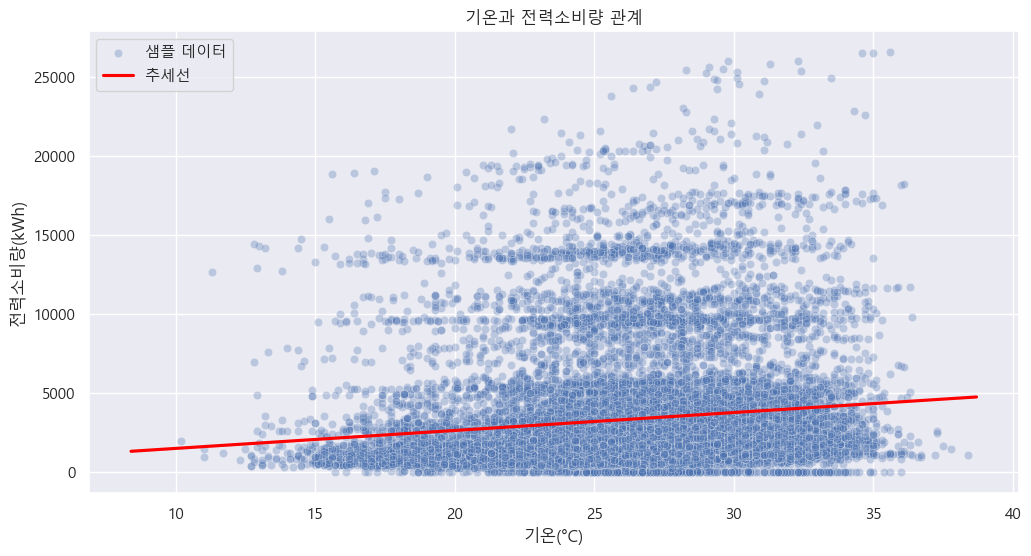

In [38]:
# 기상변수: 기온, 강수량, 풍속, 습도, 일조, 일사
# 기온과 전력소비량 관계
plt.figure(figsize=(12, 6))
sns.scatterplot(data=train.sample(20000),  # 샘플링으로 점 개수 줄임 (전체 데이터의 약 10%)
                x='기온(°C)', y='전력소비량(kWh)', alpha=0.3, label='샘플 데이터')
sns.regplot(data=train, x='기온(°C)', y='전력소비량(kWh)', 
            scatter=False, color='red', label='추세선')  # 추세선만 그리기
plt.title('기온과 전력소비량 관계')
plt.xlabel('기온(°C)')
plt.ylabel('전력소비량(kWh)')
plt.grid(True)
plt.legend()
plt.show()

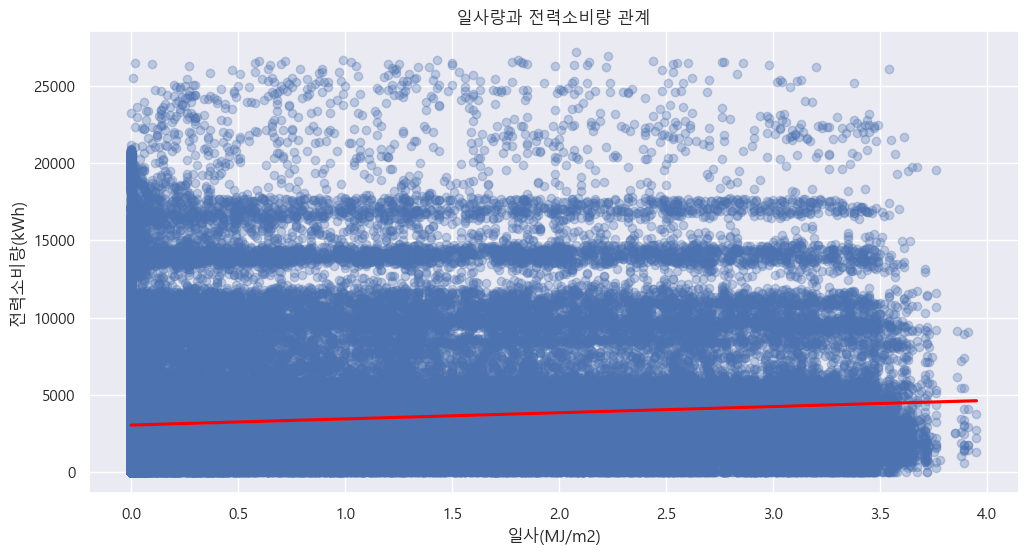

In [40]:
# 일사량과 전력소비량 관계
plt.figure(figsize=(12, 6))
sns.regplot(data=train, x='일사(MJ/m2)', y='전력소비량(kWh)',
            scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('일사량과 전력소비량 관계')
plt.xlabel('일사(MJ/m2)')
plt.ylabel('전력소비량(kWh)')
plt.grid(True)
plt.show()

c:\Users\wldlsyy34\AppData\Local\miniconda3\envs\ds_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\wldlsyy34\AppData\Local\miniconda3\envs\ds_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


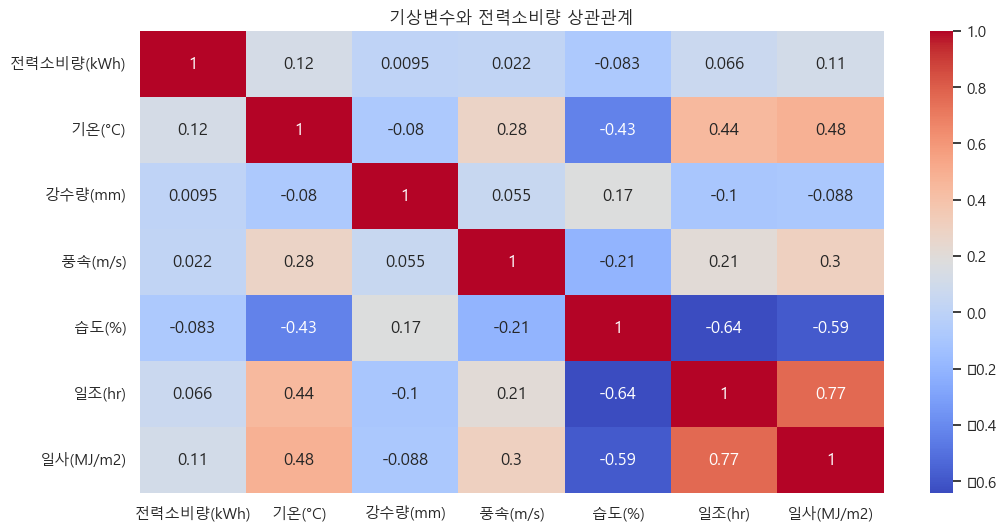

In [41]:
# 흠냐.. 기상변수와 전력소비량 전반적인 상관관계를 보자.
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(train[['전력소비량(kWh)', '기온(°C)', '강수량(mm)', '풍속(m/s)', 
                   '습도(%)', '일조(hr)', '일사(MJ/m2)']].corr(), annot=True, cmap='coolwarm', ax=ax)
ax.set_title('기상변수와 전력소비량 상관관계')
plt.show()

어라라ㅏ.. 생각보다 관계가 없잖아????
건물정보가 주어진거 보면.. 건물의 특성?에 따라 사용량이 달라질듯

3. 건물 속성 관련 가설
- 건물유형에 따라 전력 소비 패턴이 다를 것이다 (다중이용시설 vs 아파트)
- 연면적이 클수록 전력소비량이 클 것이다.
- 냉방면적이 클수록 여름철 전력소비량이 증가할 것이다.
- 태양광 설비가 있는 건물은 낮 시간대 소비량이 낮을 것이다.
- ESS가 있는 건물은 피크 시간대(14~17시) 전력소비량이 완화될 것이다.
- PCS 용량이 클수록 부하를 분산할 수 있어 전력소비량 변동이 적을 것이다.

In [30]:
train['건물유형'].value_counts()

건물유형
백화점         32640
호텔          20400
상용          20400
학교          20400
건물기타        20400
병원          18360
아파트         18360
연구소         18360
IDC(전화국)    18360
공공          16320
Name: count, dtype: int64

c:\Users\wldlsyy34\AppData\Local\miniconda3\envs\ds_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\wldlsyy34\AppData\Local\miniconda3\envs\ds_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


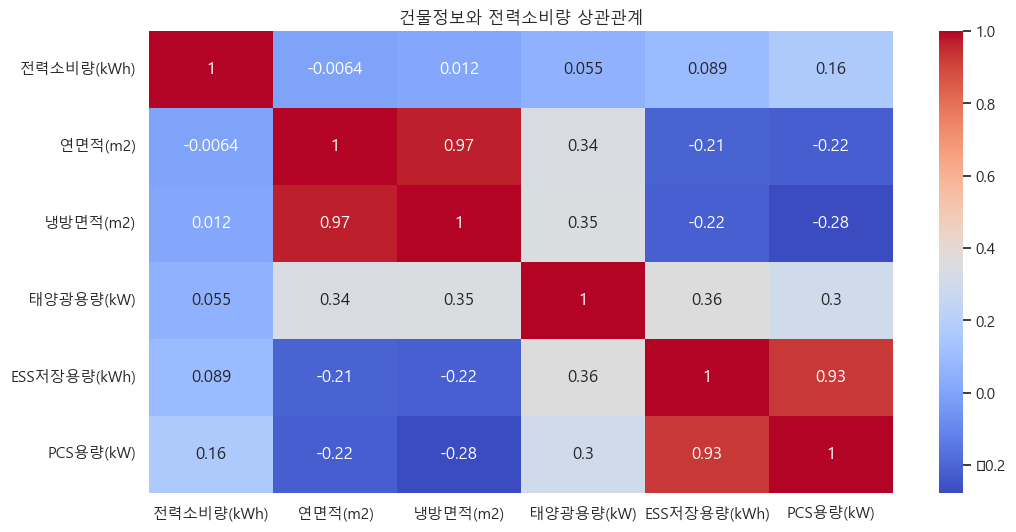

In [31]:
# 건물 정보와 전력소비량 간의 상관관계 파악
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(train[['전력소비량(kWh)', '연면적(m2)', '냉방면적(m2)', 
                   '태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)']].corr(), annot=True, cmap='coolwarm', ax=ax)
ax.set_title('건물정보와 전력소비량 상관관계')
plt.show()

- 냉방면적과 연면적은 강한 양의 상관관계를 갖는다.
- PCS용량과 ESS저장용량은 강한 양의 상관관계를 갖는다.
- 태양광용량과 연면적은 중간 정도 양의 상관관계를 갖는다.
- 태양광용량과 냉방면적은 중간 정도 양의 상관관계를 갖는다.
- PCS용량과 냉방면적은 약한 음의 상관관계를 갖는다.

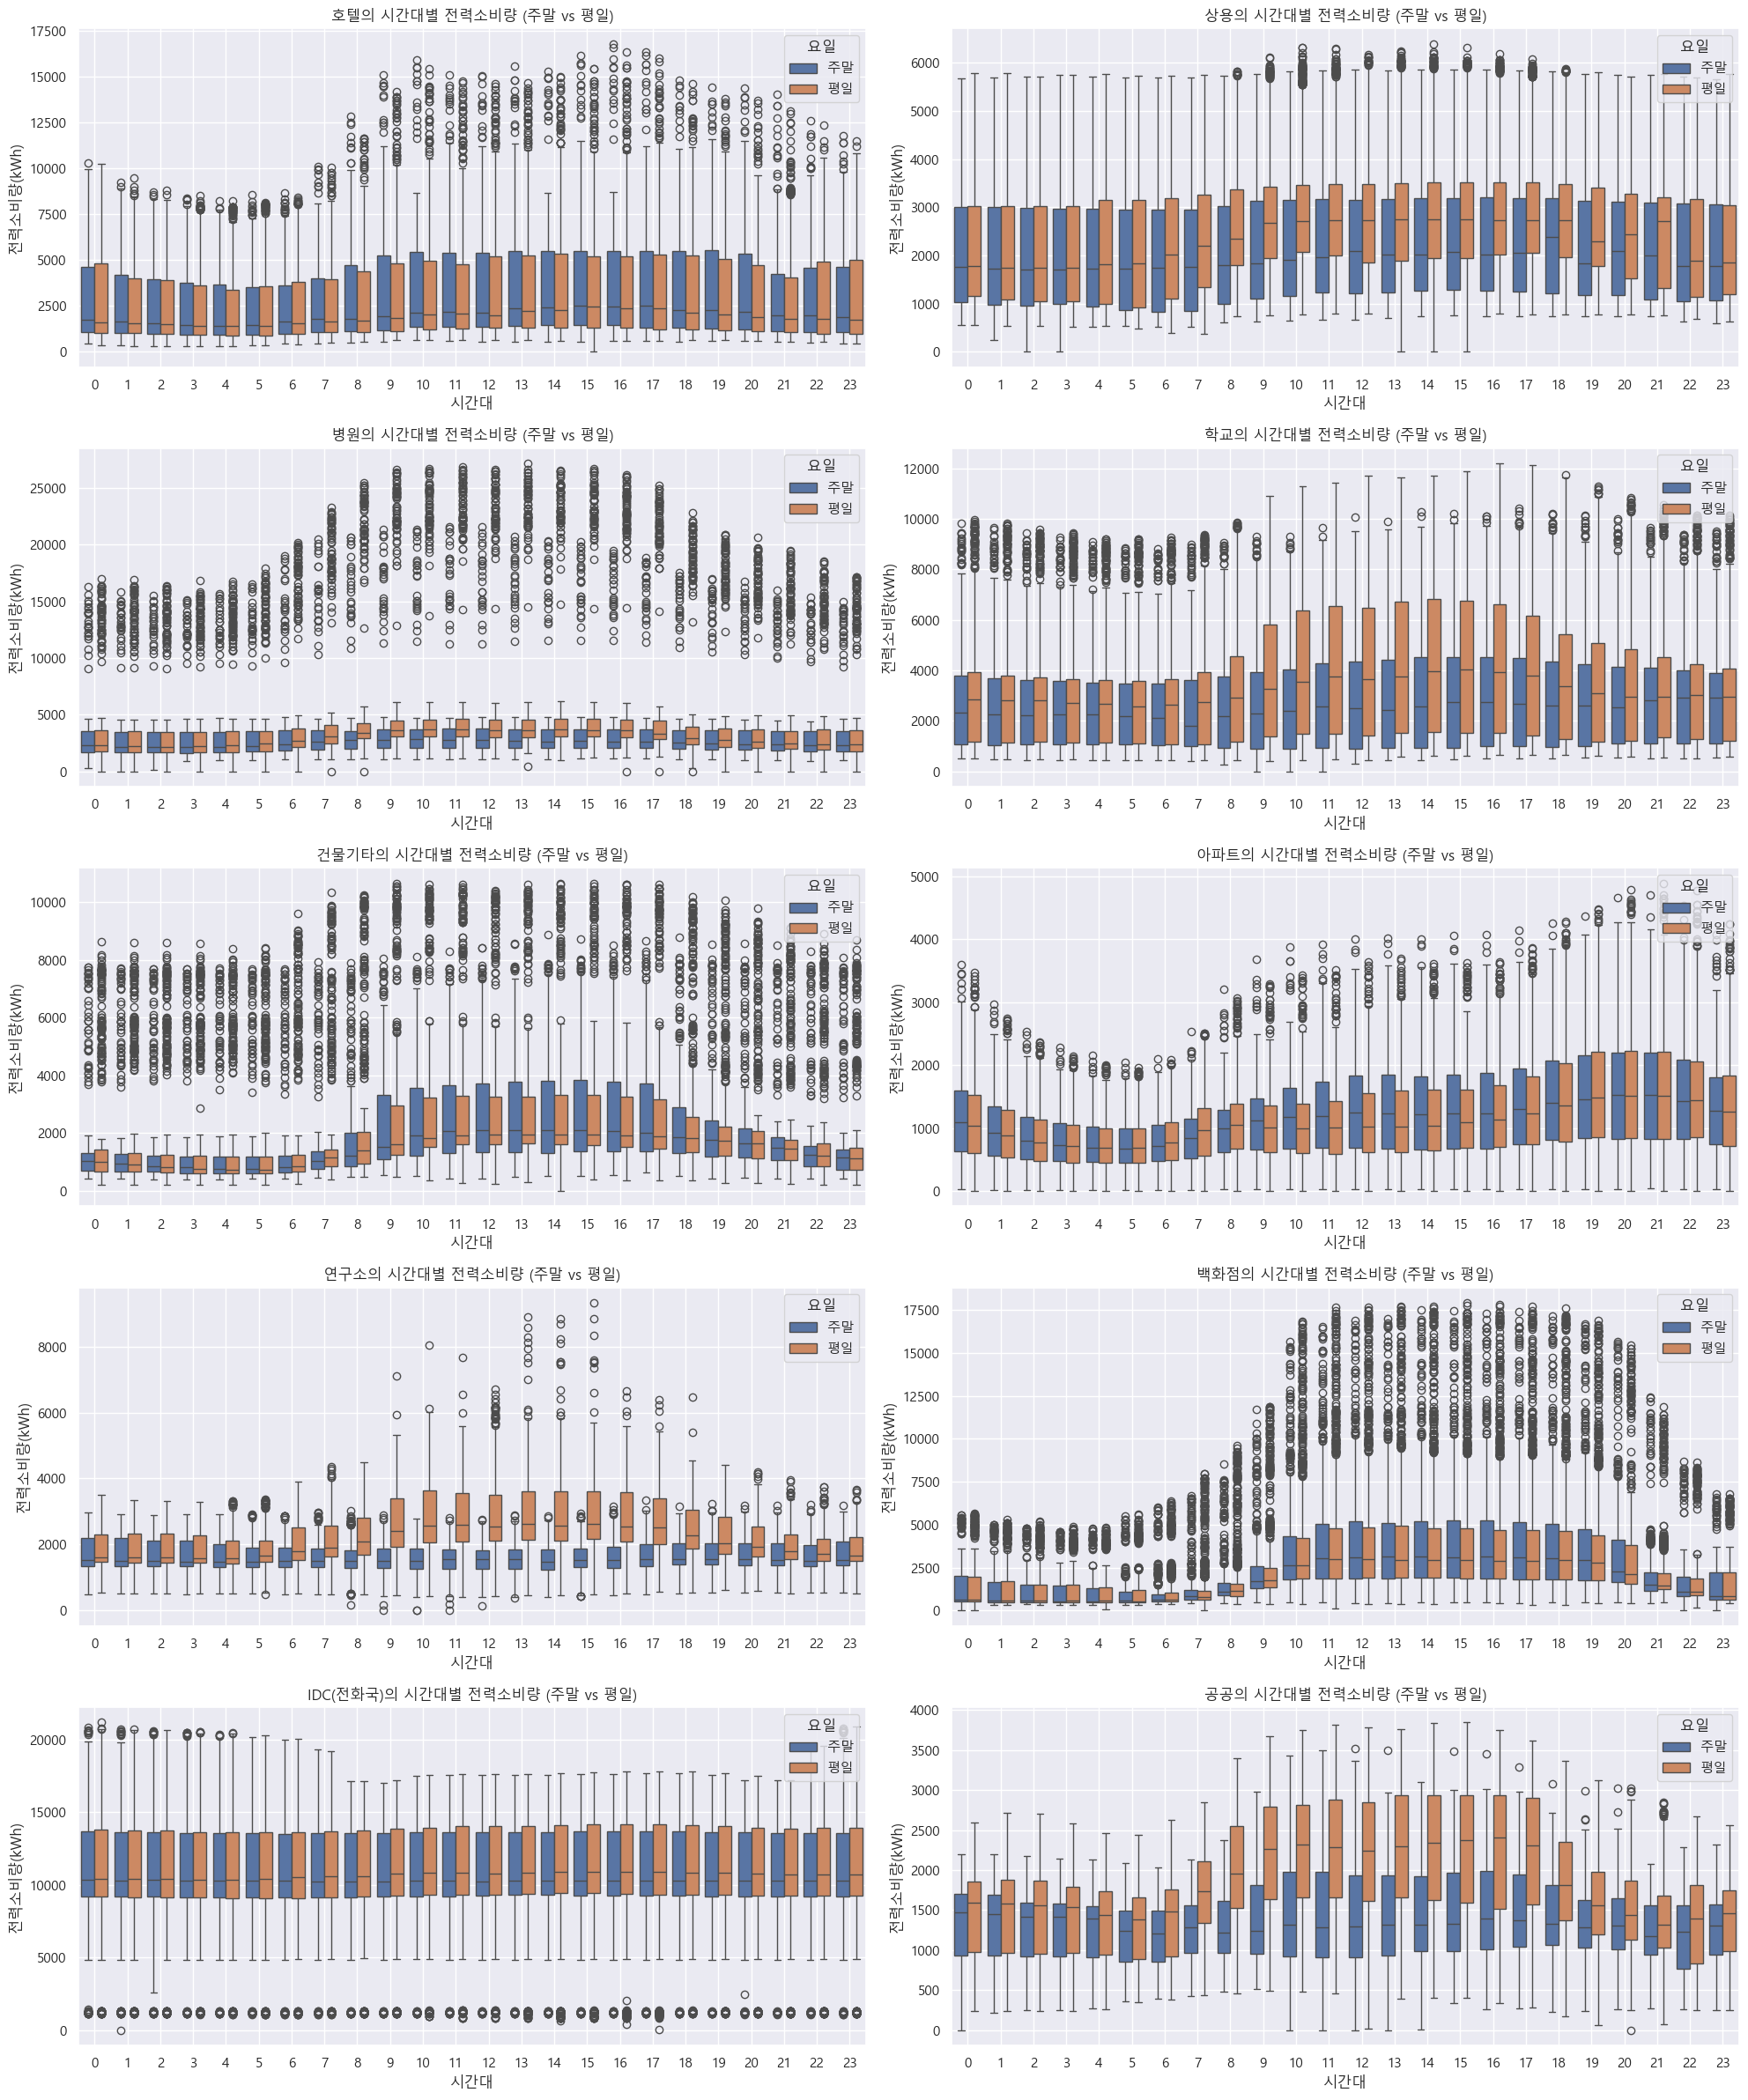

In [ ]:
# 주요 건물유형 10개별 시간대별 전력소비량 박스플롯 (5x2 서브플롯)
building_types = ['호텔', '상용', '병원', '학교', '건물기타', '아파트', '연구소', '백화점', 'IDC(전화국)', '공공']
fig, axes = plt.subplots(5, 2, figsize=(20, 24))
axes = axes.flatten()

for idx, btype in enumerate(building_types):
    data = train[train['건물유형'] == btype]
    sns.boxplot(data=data, x='시간대', y='전력소비량(kWh)', hue='요일', ax=axes[idx])
    axes[idx].set_title(f"{btype}의 시간대별 전력소비량 (주말 vs 평일)")
    axes[idx].set_xlabel('시간대')
    axes[idx].set_ylabel('전력소비량(kWh)')
    axes[idx].grid(True)
    axes[idx].legend(title='요일', loc='upper right')

plt.tight_layout()
plt.show()

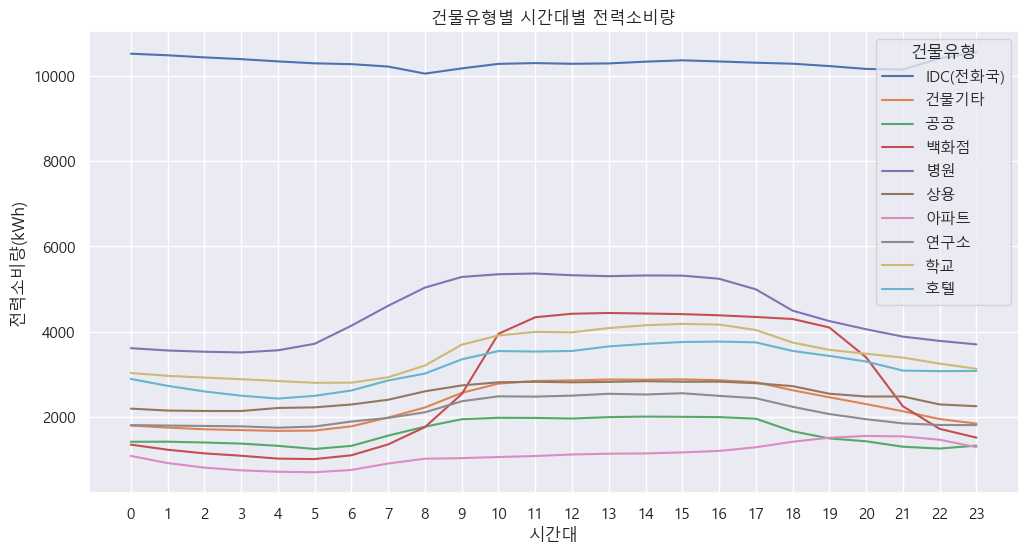

In [35]:
# 시간대별 전력소비 패턴 비교 (건물유형별)
# 건물유형별로 시간대(0~23시) 기준 평균 전력소비량 계산
building_type_hourly = train.groupby(['건물유형', '시간대'])['전력소비량(kWh)'].mean().reset_index()
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=building_type_hourly, x='시간대', y='전력소비량(kWh)', hue='건물유형', ax=ax)
ax.set_title('건물유형별 시간대별 전력소비량')
ax.set_xlabel('시간대')
ax.set_ylabel('전력소비량(kWh)')
plt.xticks(range(0, 24))  # 시간대는 0~23
plt.grid(True)
plt.show()

In [38]:
train['기온(°C)'].describe()

count    204000.000000
mean         26.098130
std           4.052888
min           8.400000
25%          23.500000
50%          26.300000
75%          28.800000
max          38.700000
Name: 기온(°C), dtype: float64

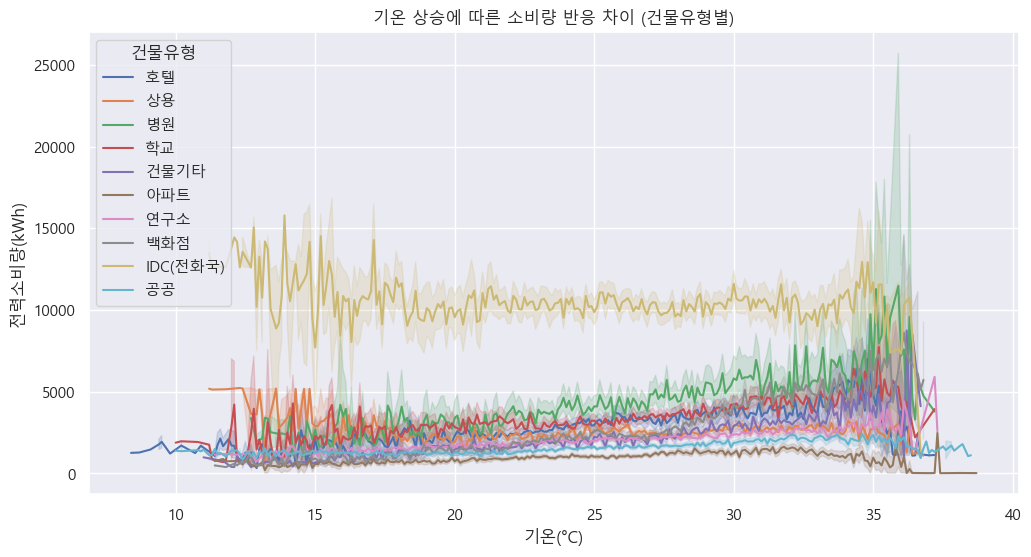

In [51]:
# 기온 상승에 따른 소비량 반응 차이 (건물유형별)
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=train, x='기온(°C)', y='전력소비량(kWh)', hue='건물유형', ax=ax)
ax.set_title('기온 상승에 따른 소비량 반응 차이 (건물유형별)')
ax.set_xlabel('기온(°C)')
ax.set_ylabel('전력소비량(kWh)')
plt.grid(True)
plt.show()

C:\Users\wldlsyy34\AppData\Local\Temp\ipykernel_24908\514532162.py:23: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  t['기온_소비량_corr'] = t.groupby('건물유형').apply(
C:\Users\wldlsyy34\AppData\Local\Temp\ipykernel_24908\514532162.py:26: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  t['습도_소비량_corr'] = t.groupby('건물유형').apply(
C:\Users\wldlsyy34\AppData\Local\Temp\ipykernel_24908\514532162.py:29: FutureWarning: DataFrameGro

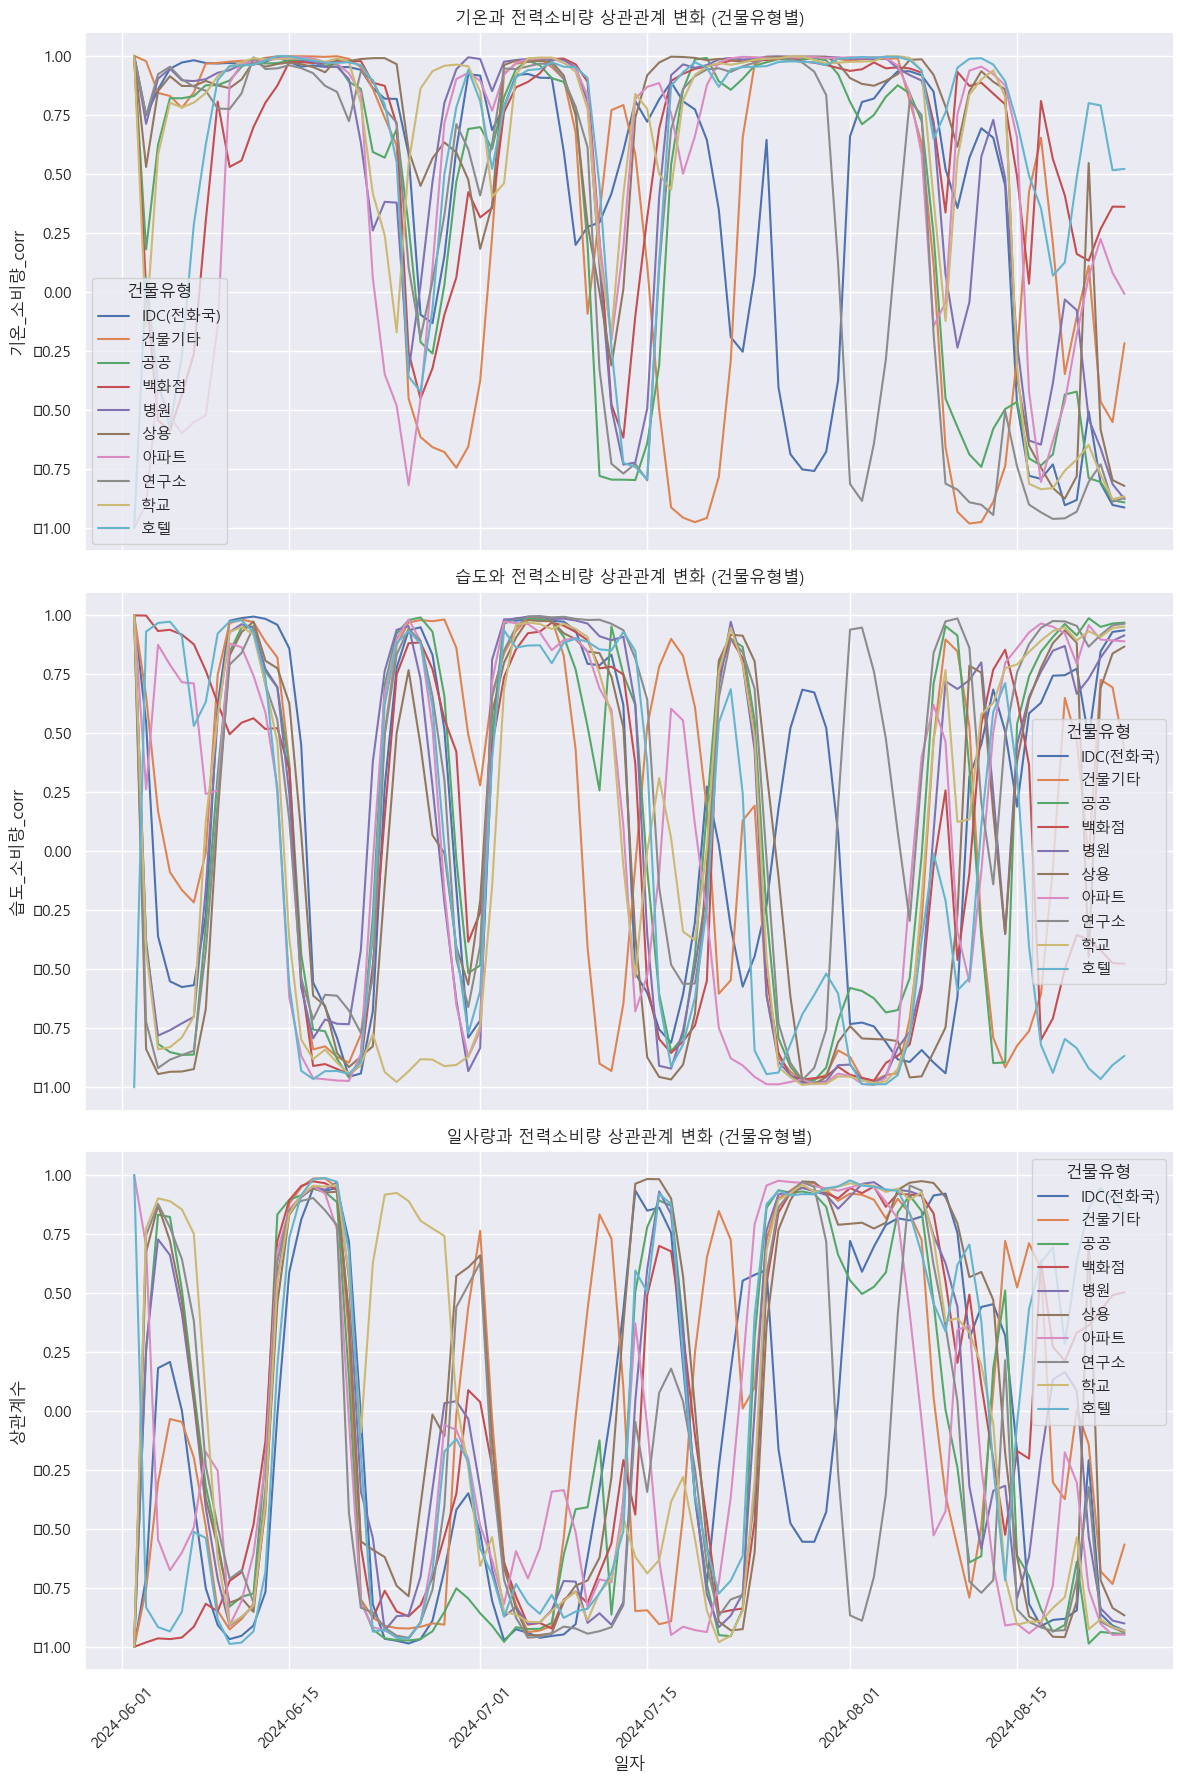

In [53]:
# 기상 변수와 소비량의 상관관계 변화 (시계열 + 건물유형)
# 일일 평균 기온, 습도, 일사량 vs 전력소비량 → rolling correlation (7일 이동 상관계수 등)
# 건물유형별로 따로 계산

# 일자 오름차순 정렬 (rolling 계산을 위해)
t = train.groupby(['일자', '건물유형']).agg({
    '전력소비량(kWh)': 'mean',
    '기온(°C)': 'mean',
    '습도(%)': 'mean',
    '일사(MJ/m2)': 'mean'
}).reset_index().sort_values(['건물유형', '일자'])

# 이동 평균 계산 (7일 이동)
t['전력소비량_이동평균'] = t.groupby('건물유형')['전력소비량(kWh)'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
t['기온_이동평균'] = t.groupby('건물유형')['기온(°C)'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
t['습도_이동평균'] = t.groupby('건물유형')['습도(%)'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
t['일사_이동평균'] = t.groupby('건물유형')['일사(MJ/m2)'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())

# rolling correlation (7일 이동 상관계수)
def rolling_corr(x, y, window=7):
    return x.rolling(window, min_periods=1).corr(y)

t['기온_소비량_corr'] = t.groupby('건물유형').apply(
    lambda df: rolling_corr(df['기온_이동평균'], df['전력소비량_이동평균'])
).reset_index(level=0, drop=True)
t['습도_소비량_corr'] = t.groupby('건물유형').apply(
    lambda df: rolling_corr(df['습도_이동평균'], df['전력소비량_이동평균'])
).reset_index(level=0, drop=True)
t['일사_소비량_corr'] = t.groupby('건물유형').apply(
    lambda df: rolling_corr(df['일사_이동평균'], df['전력소비량_이동평균'])
).reset_index(level=0, drop=True)

# 결과 시각화
fig, ax = plt.subplots(3, 1, figsize=(12, 18), sharex=True)
sns.lineplot(data=t, x='일자', y='기온_소비량_corr', hue='건물유형', ax=ax[0])
ax[0].set_title('기온과 전력소비량 상관관계 변화 (건물유형별)')
sns.lineplot(data=t, x='일자', y='습도_소비량_corr', hue='건물유형', ax=ax[1])
ax[1].set_title('습도와 전력소비량 상관관계 변화 (건물유형별)')
sns.lineplot(data=t, x='일자', y='일사_소비량_corr', hue='건물유형', ax=ax[2])
ax[2].set_title('일사량과 전력소비량 상관관계 변화 (건물유형별)')
ax[2].set_xlabel('일자')
ax[2].set_ylabel('상관계수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()